<b>Traveling Salesman Problem</b><br>
Adapted from: [PYTHON-MIP Examples](https://python-mip.readthedocs.io/en/latest/examples.html)

In [1]:
import numpy as np
from scipy.spatial import distance_matrix
import cvxpy as cvx
import matplotlib.pyplot as plt

plt.style.use('default')

In [2]:
# Generate some random Points
num_points = 20
points = np.random.uniform(-10, 10, (num_points, 2))

In [3]:
# Calculate the distance matrix
dist_mat = distance_matrix(points, points)

# Fill diagonal with 9999
np.fill_diagonal(dist_mat, 9999)

In [4]:
# Bool variable indicating if the point is used on the route or not
c = cvx.Variable((num_points, num_points), boolean = True)

In [5]:
# A variable useful for subtour elimination
u = cvx.Variable(num_points)

In [6]:
# Objective function - Minimize distance
obj = cvx.Minimize(sum([dist_mat[i,:] @ c[:,i] for i in range(num_points)]))

In [7]:
constraints = []

In [8]:
# Only 1 incoming connection for each node
for i in range(num_points):
    constraints.append(cvx.sum(c[i,:]) == 1) 

# Only 1 outbound connection for each node
for j in range(num_points):
    constraints.append(cvx.sum(c[:,j]) == 1) 

In [9]:
# Subtour elimination
for i in range(1, num_points):
    for j in range(1, num_points):
        if i != j:
            constraints.append(u[i] - u[j] + num_points * c[i,j] <= num_points - 1)

In [10]:
prob = cvx.Problem(obj, constraints)

In [11]:
opt = prob.solve()

In [12]:
# Get the route matrix
route_mat = np.around(c.value)

In [13]:
# Get the optimal tour
idx = 0
optimal_tour = []
optimal_tour.append(points[0].tolist())
for i in range(route_mat.shape[0]):
    idx = np.where(route_mat[idx, :]>= 0.99)[0][0]
    optimal_tour.append(points[idx].tolist())
optimal_tour = np.array(optimal_tour)

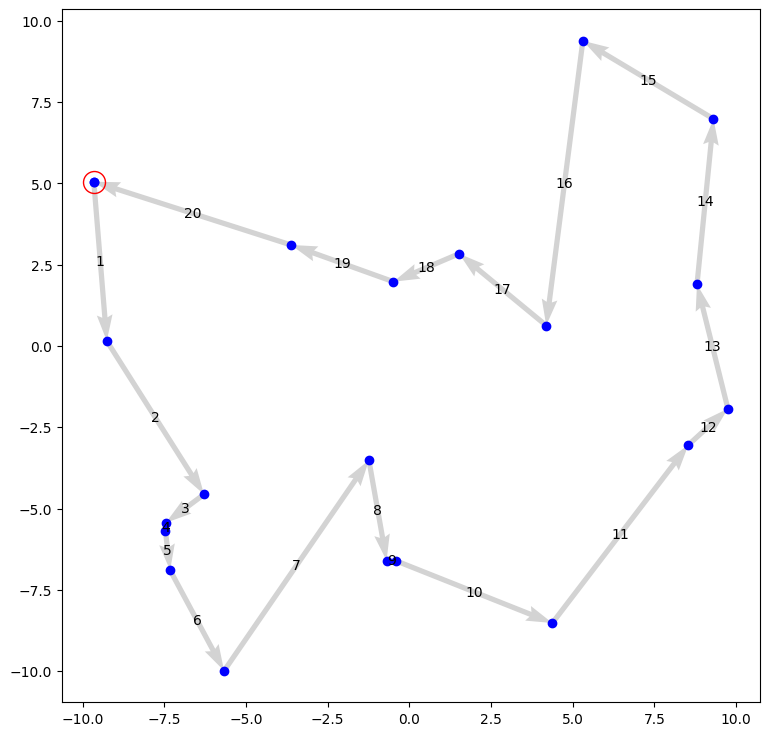

In [14]:
# Creates a figure and one subplot
fig, ax = plt.subplots(figsize=(9, 9))

# Plot the optimal tour
xcoords = optimal_tour[:,0]
ycoords = optimal_tour[:,1]
u = np.diff(xcoords)
v = np.diff(ycoords)
pos_x = xcoords[:-1] + u/2
pos_y = ycoords[:-1] + v/2

ax.quiver(pos_x, pos_y, u, v, color="lightgrey",
          angles='xy', scale_units='xy', scale=1, pivot='mid')

# Plot the points
ax.scatter(optimal_tour[:,0], optimal_tour[:,1], c='blue', marker = 'o')

# Annotate the lines with a progressive number
for i, x_i in enumerate(pos_x):
    ax.annotate(i+1, xy=(x_i, pos_y[i]), ha="center", va="center")

# Plot the start point
ax.scatter(optimal_tour[0][0], optimal_tour[0][1], s=250, 
           c=np.array([[0,0,0,0]]), edgecolors='red')

# Show the plot
ax.set_aspect('equal', adjustable='datalim')
plt.show()